In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df=pd.read_csv('dataset_diabetes/Reshaped_dataframe.csv')
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,24437208,135,Caucasian,Female,[50-60),NaN,2,1,1,8,...,No,Steady,No,No,No,No,No,Ch,Yes,<30
1,29758806,378,Caucasian,Female,[50-60),NaN,3,1,1,2,...,No,No,No,No,No,No,No,No,No,NO
2,189899286,729,Caucasian,Female,[80-90),NaN,1,3,7,4,...,No,No,No,No,No,No,No,No,Yes,NO
3,64331490,774,Caucasian,Female,[80-90),NaN,1,1,7,3,...,No,No,No,No,No,No,No,Ch,Yes,NO
4,14824206,927,AfricanAmerican,Female,[30-40),NaN,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69656,418513058,189351095,Caucasian,Female,[80-90),NaN,1,1,7,1,...,No,No,No,No,No,No,No,No,No,NO
69657,359719064,189365864,Other,Male,[60-70),NaN,1,1,7,3,...,No,Steady,No,No,No,No,No,No,Yes,NO
69658,338462954,189445127,Caucasian,Female,[80-90),NaN,1,1,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,NO
69659,443811536,189481478,Caucasian,Female,[40-50),NaN,1,4,7,14,...,No,Down,No,No,No,No,No,Ch,Yes,>30


In [2]:
df.dtypes

Unnamed: 0                   int64
encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide      

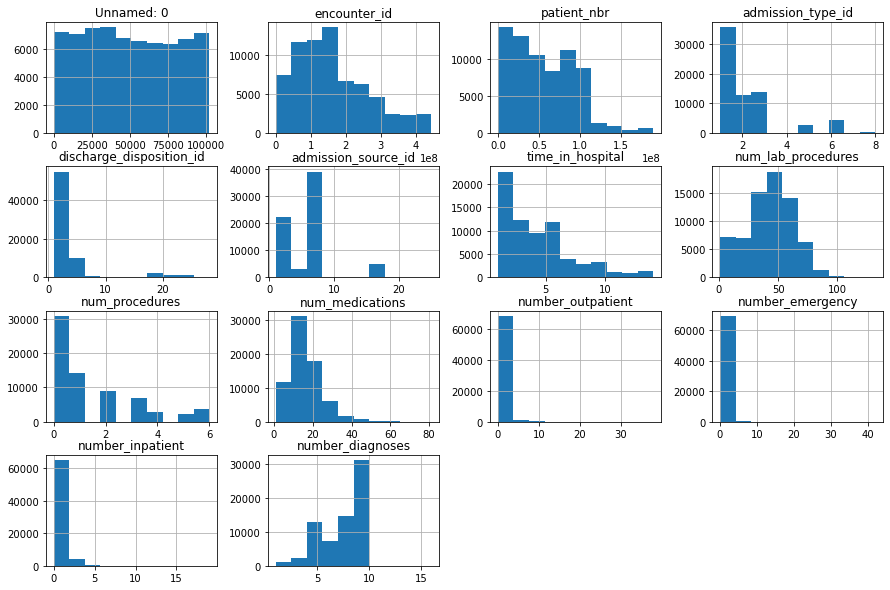

In [3]:
df.hist(figsize=(15,10))
plt.show()

<ipython-input-30-e22258c6315d>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.columns, rotation=90, fontsize=15)
<ipython-input-30-e22258c6315d>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(df.columns, fontsize=15)


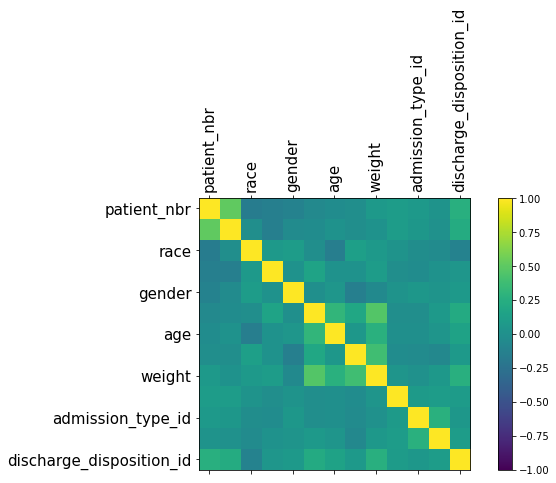

In [30]:
#Rahman: why isn't all our numerical variables included in the correlation plot? 
#Its only every second variable which has a tick and label

correlations = df.corr()
fig=plt.figure(figsize=(10,5))
ax=fig.add_subplot(111)
cax=ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ax.set_xticklabels(df.columns, rotation=90, fontsize=15)
ax.set_yticklabels(df.columns, fontsize=15)
plt.show()
    

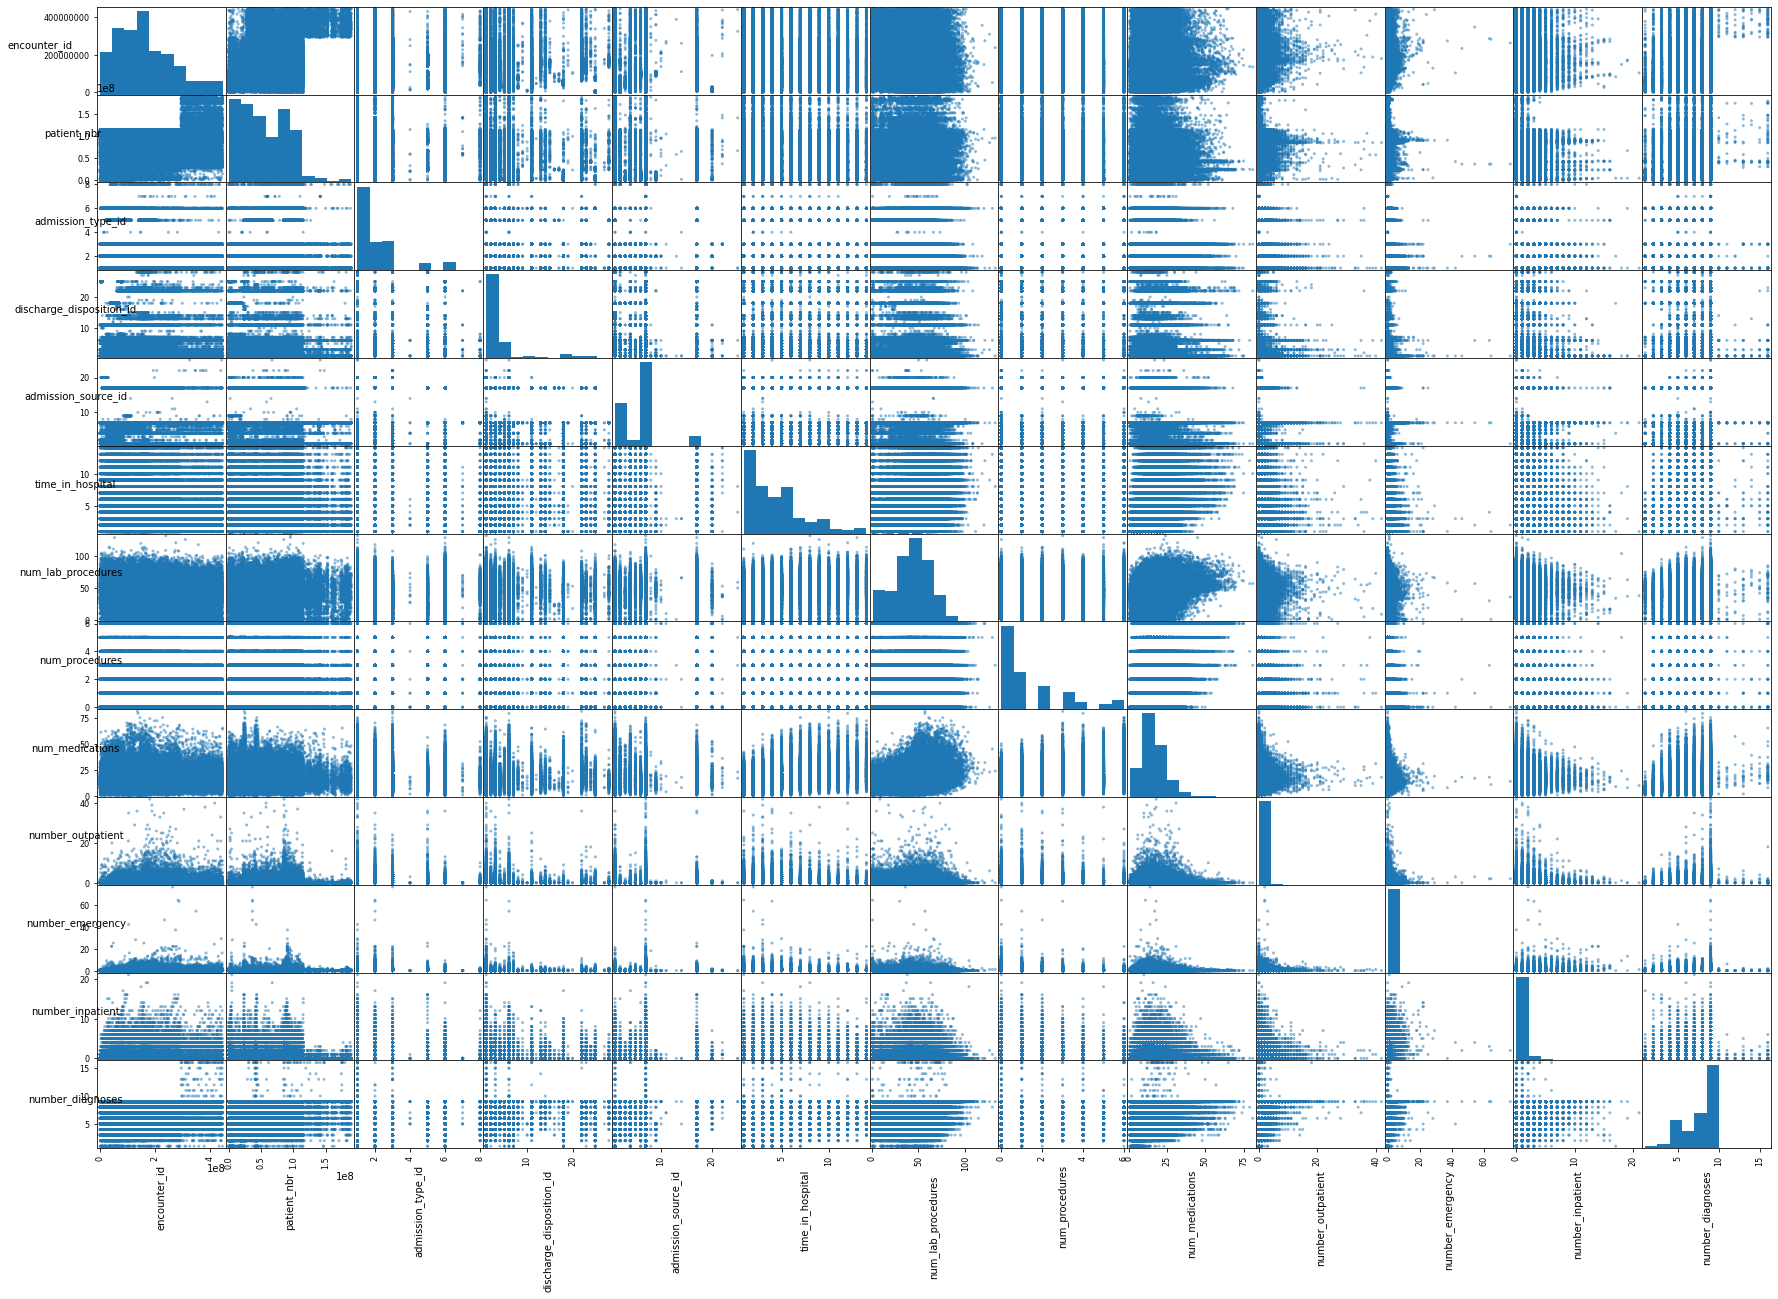

In [38]:
axes = pd.plotting.scatter_matrix(df, figsize=(30,21))
[ax.set_xlabel(ax.get_xlabel(), fontsize = 10, rotation = 90) for ax in axes.ravel()]
[ax.set_ylabel(ax.get_ylabel(), fontsize = 10, rotation = 0) for ax in axes.ravel()]
plt.show()

PREPROCESSING

In [39]:
#Divide numeric, numeric (actually categorical) and categorical (string)
#Scale numeric
#Encode categorical

In [44]:
#TRAIN-TEST-SPLIT
from sklearn.model_selection import train_test_split

X=df.iloc[:, :-1]
y=df.iloc[:, -1]     #genindlagt?

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=45)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
55040,159509556,25291233,AfricanAmerican,Female,[40-50),?,2,1,4,7,...,No,No,Down,No,No,No,No,No,Ch,Yes
19382,69121914,100037340,Caucasian,Female,[70-80),[50-75),3,6,1,7,...,No,No,Steady,No,No,No,No,No,No,Yes
46207,142694106,45826569,?,Female,[70-80),?,3,3,4,4,...,No,No,Steady,No,No,No,No,No,No,Yes
51557,153593730,24432543,AfricanAmerican,Female,[50-60),?,1,6,7,3,...,No,No,Up,No,No,No,No,No,Ch,Yes
1694,11221794,38601,Caucasian,Male,[80-90),?,1,1,7,5,...,No,No,Steady,No,No,No,No,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12895,51898956,709407,Caucasian,Male,[70-80),?,3,18,1,3,...,No,No,No,No,No,No,No,No,No,Yes
60960,170451342,63957150,Caucasian,Male,[80-90),?,1,1,7,7,...,No,No,No,No,No,No,No,No,No,No
6012,30441312,2102031,Caucasian,Female,[70-80),?,1,1,7,7,...,No,No,No,No,No,No,No,No,Ch,Yes
63107,175569234,110877237,Caucasian,Male,[60-70),?,2,1,7,4,...,No,No,Up,No,No,No,No,No,Ch,Yes


In [58]:
categorical_cols=df.dtypes==object
categorical_cols

encounter_id                False
patient_nbr                 False
race                         True
gender                       True
age                          True
weight                       True
admission_type_id           False
discharge_disposition_id    False
admission_source_id         False
time_in_hospital            False
payer_code                   True
medical_specialty            True
num_lab_procedures          False
num_procedures              False
num_medications             False
number_outpatient           False
number_emergency            False
number_inpatient            False
diag_1                       True
diag_2                       True
diag_3                       True
number_diagnoses            False
max_glu_serum                True
A1Cresult                    True
metformin                    True
repaglinide                  True
nateglinide                  True
chlorpropamide               True
glimepiride                  True
acetohexamide 

In [75]:
#PIPELINE
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline

# Divide numerical and categorical variables
#numerical_cols=df.dtypes!=object
categorical_cols=X_train.dtypes==object              #X_train.dtypes or df.dtypes??

# Categorical pipeline
categorical_preprocessing = Pipeline(
[
    ('Imputation', SimpleImputer(strategy='constant', fill_value='?')),
    ('One Hot Encoding', OneHotEncoder(handle_unknown='ignore')),
]
)

# Numeric pipeline
numeric_preprocessing = Pipeline(
[
     ('Imputation', SimpleImputer(strategy='mean')),
     ('Scaling', StandardScaler())
]
)


# Creating preprocessing pipeline
preprocessing = make_column_transformer(
     (numeric_preprocessing, ~categorical_cols)#,               #INDSÆT LISTE AF NUMERISK
     #(categorical_preprocessing, categorical_cols),
)

# Final pipeline
pipeline = Pipeline(
[('Preprocessing', preprocessing)]
)


#

test = pipeline.fit_transform(X_train)

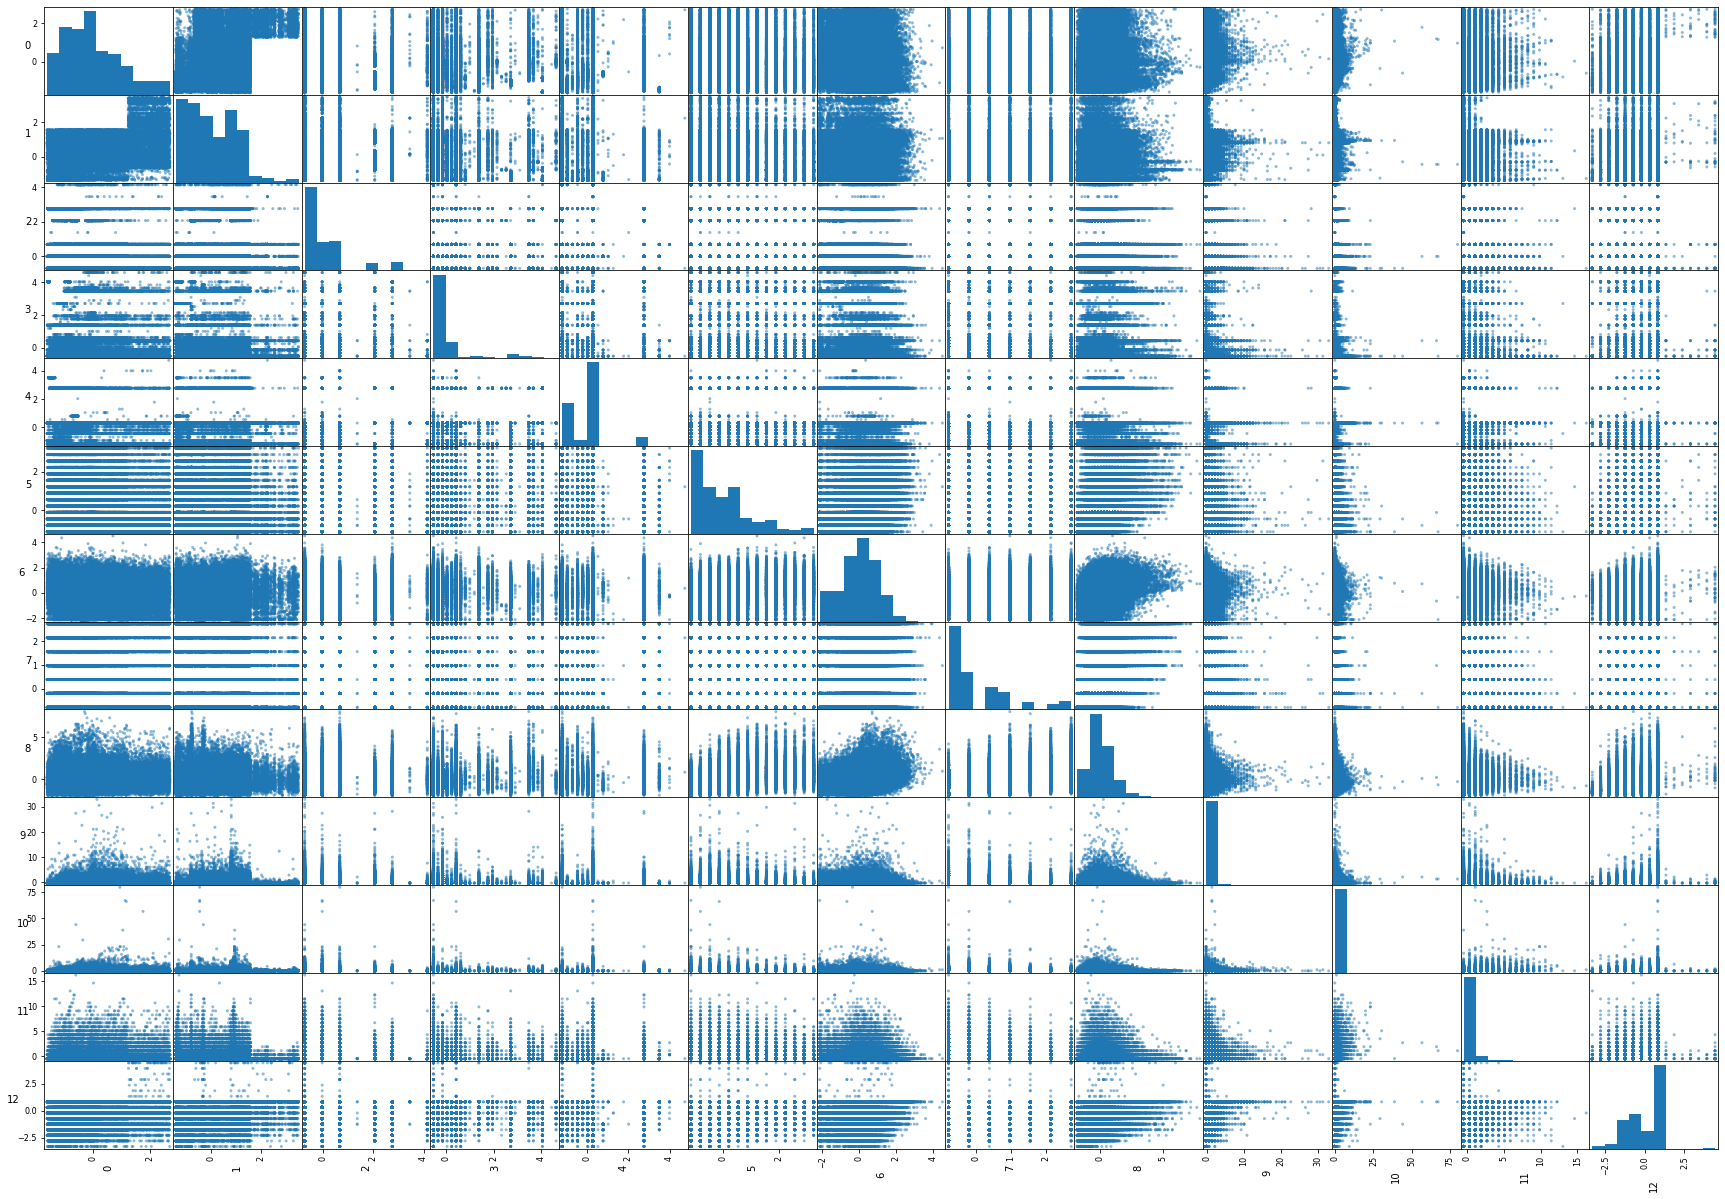

In [76]:
#udvælg numeriske kolonner
var=pd.DataFrame(data=test)


axes = pd.plotting.scatter_matrix(var, figsize=(30,21))
[ax.set_xlabel(ax.get_xlabel(), fontsize = 10, rotation = 90) for ax in axes.ravel()]
[ax.set_ylabel(ax.get_ylabel(), fontsize = 10, rotation = 0) for ax in axes.ravel()]
plt.show()

MODEL BUILDING